# M-Bias plot

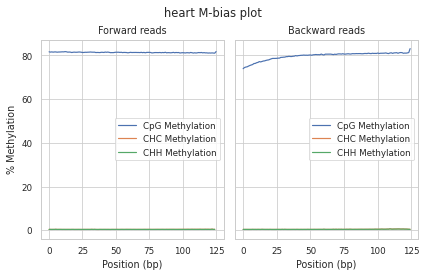

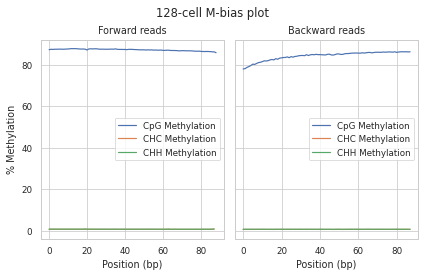

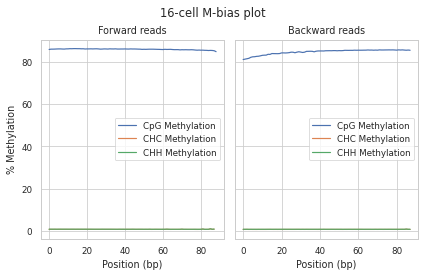

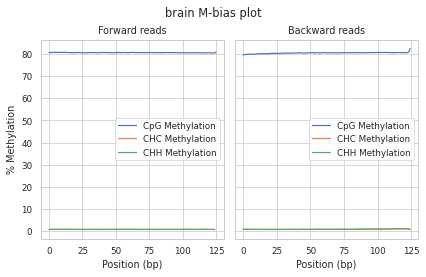

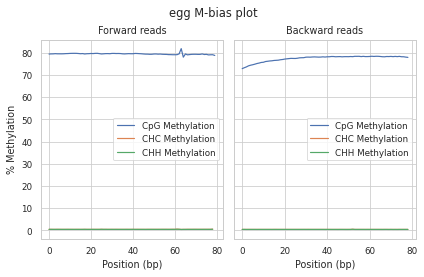

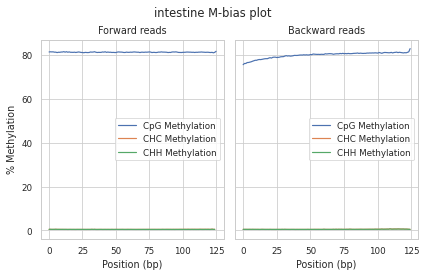

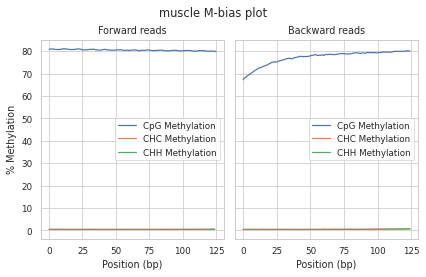

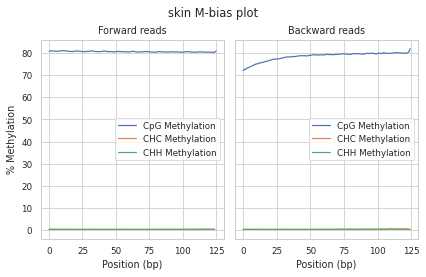

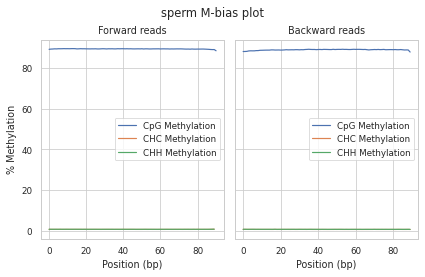

In [26]:
import os
for filename in os.listdir("bismark_reports/"):
    if filename.endswith("M-bias.txt"):        
        fin = open(f"bismark_reports/{filename}")
        data = []
        for i in range(6):
            for j in range(3):
                line = fin.readline()
            reads = []
            line = fin.readline()
            while line != "\n":
                line = list(map(float, line.split()))
                reads.append(line)
                line = fin.readline()
            data.append(np.array(reads))
            line = fin.readline()
        filename = filename.replace("M-bias", "")
        filename = filename.replace("sorted_by_name", "")
        filename = filename.replace("_", "")
        filename = filename.replace(".", "")
        filename = filename.replace("txt", "")
        fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True)
        ax[0].plot(data[0][:, 3], label="CpG Methylation")
        ax[0].plot(data[1][:, 3], label="CHC Methylation")
        ax[0].plot(data[2][:, 3], label="CHH Methylation")
        ax[0].set_xlabel("Position (bp)")
        ax[0].set_ylabel("% Methylation")
        ax[0].set_title("Forward reads")
        ax[0].legend()

        ax[1].plot(data[3][:, 3], label="CpG Methylation")
        ax[1].plot(data[4][:, 3], label="CHC Methylation")
        ax[1].plot(data[5][:, 3], label="CHH Methylation")
        ax[1].set_xlabel("Position (bp)")
        ax[1].set_title("Backward reads")
        ax[1].legend()
        fig.suptitle(filename + " M-bias plot")
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.savefig(filename + ".jpg", dpi=200)